### Vehicle Collision Analysis

Analyst: Daniel Elkin <br />
Date: 06/12/2019

In [176]:
import pandas as pd
import matplotlib as plt

In [177]:
%matplotlib inline

#### I. Data Loading and Validation

In [178]:
data_file = "data/small.csv"
# data_file = "data/NYPD_Motor_Vehicle_Collisions.csv"

rows = !wc -l < $data_file
rows = int(rows[0])

print(f"There are {rows} rows. The first of which is: \n")
# !head -n1 $data_file | grep -o "," | wc -l

There are 1000 rows. The first of which is: 



In [179]:
df = pd.read_csv(data_file, 
                 index_col="DATE_TIME",
                 parse_dates=[["DATE", "TIME"]],
                 usecols=["DATE", "TIME", "UNIQUE KEY", "BOROUGH"]
                )

In [180]:
len(df)

999

In [181]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2019-06-04 00:00:00 to 2019-06-03 21:10:00
Data columns (total 2 columns):
BOROUGH       684 non-null object
UNIQUE KEY    999 non-null int64
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [182]:
df.rename(columns=lambda c: c.lower().replace(" ", "_"))
df.index.names=["date_time"]

In [184]:
df.head()

,BOROUGH,UNIQUE KEY
date_time,,
2019-06-04,BRONX,4144652
2019-06-04,BRONX,4145339
2019-06-04,BROOKLYN,4145344
2019-06-04,MANHATTAN,4145985
2019-06-04,MANHATTAN,4144953


In [80]:
df["TIME"] = df["DATE_TIME"].dt.time

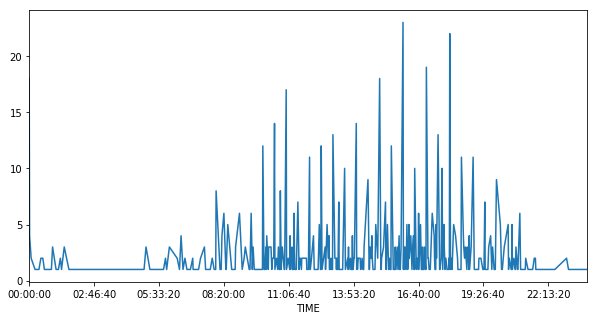

In [89]:
df.groupby("TIME").TIME.count().plot(figsize=(10, 5))

In [103]:
df.set_index("TIME")#.groupby(pd.Grouper(freq="h")).count().plot(figsize=(10, 5))

,DATE_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
TIME,,,,,,,,,,,,,,,,,,,,,
00:00:00,2019-06-04 00:00:00,BRONX,10453.0,40.851800,-73.909225,"(40.8518, -73.909225)",JEROME AVENUE,EAST TREMONT AVENUE,NaN,0,...,NaN,NaN,NaN,NaN,4144652,Tractor Truck Diesel,NaN,NaN,NaN,NaN
00:00:00,2019-06-04 00:00:00,BRONX,10473.0,40.817467,-73.853960,"(40.817467, -73.85396)",PUGSLEY AVENUE,CAESAR PLACE,NaN,0,...,Unspecified,NaN,NaN,NaN,4145339,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
00:00:00,2019-06-04 00:00:00,BROOKLYN,11212.0,40.672060,-73.903600,"(40.67206, -73.9036)",JUNIUS STREET,GLENMORE AVENUE,NaN,0,...,Unspecified,NaN,NaN,NaN,4145344,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
00:00:00,2019-06-04 00:00:00,MANHATTAN,10025.0,40.790928,-73.968930,"(40.790928, -73.96893)",COLUMBUS AVENUE,WEST 93 STREET,NaN,0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4145985,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
00:00:00,2019-06-04 00:00:00,MANHATTAN,10031.0,40.826427,-73.950455,"(40.826427, -73.950455)",BROADWAY,WEST 145 STREET,NaN,0,...,NaN,NaN,NaN,NaN,4144953,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
00:00:00,2019-06-04 00:00:00,MANHATTAN,10112.0,40.758568,-73.979210,"(40.758568, -73.97921)",NaN,NaN,29 WEST 49 STREET,0,...,Unspecified,NaN,NaN,NaN,4144941,Taxi,Taxi,NaN,NaN,NaN
00:00:00,2019-06-04 00:00:00,NaN,NaN,40.693650,-73.983330,"(40.69365, -73.98333)",MYRTLE AVENUE,NaN,NaN,0,...,Unspecified,NaN,NaN,NaN,4146423,Van,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
00:00:00,2019-06-04 00:00:00,MANHATTAN,10128.0,40.777554,-73.948890,"(40.777554, -73.94889)",1 AVENUE,EAST 87 STREET,NaN,1,...,Unspecified,NaN,NaN,NaN,4145382,Sedan,Bike,NaN,NaN,NaN
00:01:00,2019-06-04 00:01:00,BROOKLYN,11249.0,40.699177,-73.960500,"(40.699177, -73.9605)",KENT AVENUE,WALLABOUT STREET,NaN,0,...,Unspecified,NaN,NaN,NaN,4144592,Station Wagon/Sport Utility Vehicle,Tanker,NaN,NaN,NaN


In [97]:
df

,DATE_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,2019-06-04 00:00:00,BRONX,10453.0,40.851800,-73.909225,"(40.8518, -73.909225)",JEROME AVENUE,EAST TREMONT AVENUE,NaN,0,...,NaN,NaN,NaN,4144652,Tractor Truck Diesel,NaN,NaN,NaN,NaN,00:00:00
1,2019-06-04 00:00:00,BRONX,10473.0,40.817467,-73.853960,"(40.817467, -73.85396)",PUGSLEY AVENUE,CAESAR PLACE,NaN,0,...,NaN,NaN,NaN,4145339,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2,2019-06-04 00:00:00,BROOKLYN,11212.0,40.672060,-73.903600,"(40.67206, -73.9036)",JUNIUS STREET,GLENMORE AVENUE,NaN,0,...,NaN,NaN,NaN,4145344,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
3,2019-06-04 00:00:00,MANHATTAN,10025.0,40.790928,-73.968930,"(40.790928, -73.96893)",COLUMBUS AVENUE,WEST 93 STREET,NaN,0,...,NaN,NaN,NaN,4145985,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
4,2019-06-04 00:00:00,MANHATTAN,10031.0,40.826427,-73.950455,"(40.826427, -73.950455)",BROADWAY,WEST 145 STREET,NaN,0,...,NaN,NaN,NaN,4144953,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,00:00:00
5,2019-06-04 00:00:00,MANHATTAN,10112.0,40.758568,-73.979210,"(40.758568, -73.97921)",NaN,NaN,29 WEST 49 STREET,0,...,NaN,NaN,NaN,4144941,Taxi,Taxi,NaN,NaN,NaN,00:00:00
6,2019-06-04 00:00:00,NaN,NaN,40.693650,-73.983330,"(40.69365, -73.98333)",MYRTLE AVENUE,NaN,NaN,0,...,NaN,NaN,NaN,4146423,Van,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
7,2019-06-04 00:00:00,MANHATTAN,10128.0,40.777554,-73.948890,"(40.777554, -73.94889)",1 AVENUE,EAST 87 STREET,NaN,1,...,NaN,NaN,NaN,4145382,Sedan,Bike,NaN,NaN,NaN,00:00:00
8,2019-06-04 00:01:00,BROOKLYN,11249.0,40.699177,-73.960500,"(40.699177, -73.9605)",KENT AVENUE,WALLABOUT STREET,NaN,0,...,NaN,NaN,NaN,4144592,Station Wagon/Sport Utility Vehicle,Tanker,NaN,NaN,NaN,00:01:00
9,2019-06-04 00:05:00,MANHATTAN,10001.0,NaN,NaN,NaN,WEST 34 STREET,12 AVENUE,NaN,1,...,NaN,NaN,NaN,4145637,Sedan,Taxi,NaN,NaN,NaN,00:05:00


In [95]:
df.set_index("DATE_TIME")

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2019-06-04 00:00:00,BRONX,10453.0,40.851800,-73.909225,"(40.8518, -73.909225)",JEROME AVENUE,EAST TREMONT AVENUE,NaN,0,0,...,NaN,NaN,NaN,4144652,Tractor Truck Diesel,NaN,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,BRONX,10473.0,40.817467,-73.853960,"(40.817467, -73.85396)",PUGSLEY AVENUE,CAESAR PLACE,NaN,0,0,...,NaN,NaN,NaN,4145339,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,BROOKLYN,11212.0,40.672060,-73.903600,"(40.67206, -73.9036)",JUNIUS STREET,GLENMORE AVENUE,NaN,0,0,...,NaN,NaN,NaN,4145344,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10025.0,40.790928,-73.968930,"(40.790928, -73.96893)",COLUMBUS AVENUE,WEST 93 STREET,NaN,0,0,...,NaN,NaN,NaN,4145985,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10031.0,40.826427,-73.950455,"(40.826427, -73.950455)",BROADWAY,WEST 145 STREET,NaN,0,0,...,NaN,NaN,NaN,4144953,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10112.0,40.758568,-73.979210,"(40.758568, -73.97921)",NaN,NaN,29 WEST 49 STREET,0,0,...,NaN,NaN,NaN,4144941,Taxi,Taxi,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,NaN,NaN,40.693650,-73.983330,"(40.69365, -73.98333)",MYRTLE AVENUE,NaN,NaN,0,0,...,NaN,NaN,NaN,4146423,Van,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10128.0,40.777554,-73.948890,"(40.777554, -73.94889)",1 AVENUE,EAST 87 STREET,NaN,1,0,...,NaN,NaN,NaN,4145382,Sedan,Bike,NaN,NaN,NaN,00:00:00
2019-06-04 00:01:00,BROOKLYN,11249.0,40.699177,-73.960500,"(40.699177, -73.9605)",KENT AVENUE,WALLABOUT STREET,NaN,0,0,...,NaN,NaN,NaN,4144592,Station Wagon/Sport Utility Vehicle,Tanker,NaN,NaN,NaN,00:01:00


In [117]:
df_time = df.set_index("DATE_TIME")
df_time



,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2019-06-04 00:00:00,BRONX,10453.0,40.851800,-73.909225,"(40.8518, -73.909225)",JEROME AVENUE,EAST TREMONT AVENUE,NaN,0,0,...,NaN,NaN,NaN,4144652,Tractor Truck Diesel,NaN,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,BRONX,10473.0,40.817467,-73.853960,"(40.817467, -73.85396)",PUGSLEY AVENUE,CAESAR PLACE,NaN,0,0,...,NaN,NaN,NaN,4145339,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,BROOKLYN,11212.0,40.672060,-73.903600,"(40.67206, -73.9036)",JUNIUS STREET,GLENMORE AVENUE,NaN,0,0,...,NaN,NaN,NaN,4145344,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10025.0,40.790928,-73.968930,"(40.790928, -73.96893)",COLUMBUS AVENUE,WEST 93 STREET,NaN,0,0,...,NaN,NaN,NaN,4145985,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10031.0,40.826427,-73.950455,"(40.826427, -73.950455)",BROADWAY,WEST 145 STREET,NaN,0,0,...,NaN,NaN,NaN,4144953,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10112.0,40.758568,-73.979210,"(40.758568, -73.97921)",NaN,NaN,29 WEST 49 STREET,0,0,...,NaN,NaN,NaN,4144941,Taxi,Taxi,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,NaN,NaN,40.693650,-73.983330,"(40.69365, -73.98333)",MYRTLE AVENUE,NaN,NaN,0,0,...,NaN,NaN,NaN,4146423,Van,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,00:00:00
2019-06-04 00:00:00,MANHATTAN,10128.0,40.777554,-73.948890,"(40.777554, -73.94889)",1 AVENUE,EAST 87 STREET,NaN,1,0,...,NaN,NaN,NaN,4145382,Sedan,Bike,NaN,NaN,NaN,00:00:00
2019-06-04 00:01:00,BROOKLYN,11249.0,40.699177,-73.960500,"(40.699177, -73.9605)",KENT AVENUE,WALLABOUT STREET,NaN,0,0,...,NaN,NaN,NaN,4144592,Station Wagon/Sport Utility Vehicle,Tanker,NaN,NaN,NaN,00:01:00


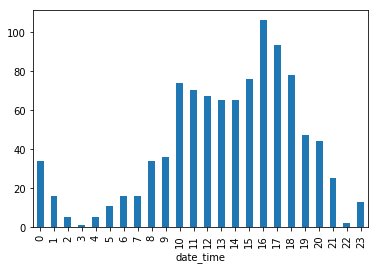

In [185]:
df.groupby(df.index.hour).count()["UNIQUE KEY"].plot(kind="bar")



In [154]:
df[(df["DATE_TIME"].dt.hour >= 16) & (df["DATE_TIME"].dt.hour < 17)]#.TIME.count()


,DATE_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
209,2019-06-04 16:00:00,BROOKLYN,11222.0,40.724260,-73.949295,"(40.72426, -73.949295)",NaN,NaN,112 NASSAU AVENUE,0,...,NaN,NaN,NaN,4145226,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,16:00:00
210,2019-06-04 16:00:00,MANHATTAN,10001.0,40.749020,-73.988045,"(40.74902, -73.988045)",WEST 33 STREET,BROADWAY,NaN,0,...,NaN,NaN,NaN,4145510,Sedan,Pick-up Truck,NaN,NaN,NaN,16:00:00
211,2019-06-04 16:00:00,MANHATTAN,10014.0,40.730320,-74.004690,"(40.73032, -74.00469)",LEROY STREET,7 AVENUE SOUTH,NaN,0,...,NaN,NaN,NaN,4145390,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,16:00:00
212,2019-06-04 16:00:00,QUEENS,11385.0,40.701145,-73.907005,"(40.701145, -73.907005)",NaN,NaN,1722 MADISON STREET,0,...,NaN,NaN,NaN,4145416,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,16:00:00
213,2019-06-04 16:00:00,QUEENS,11435.0,40.701214,-73.813370,"(40.701214, -73.81337)",90 AVENUE,138 PLACE,NaN,0,...,NaN,NaN,NaN,4145132,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,16:00:00
214,2019-06-04 16:00:00,NaN,NaN,40.738194,-73.849200,"(40.738194, -73.8492)",LONG ISLAND EXPRESSWAY,NaN,NaN,0,...,NaN,NaN,NaN,4145288,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,16:00:00
215,2019-06-04 16:00:00,NaN,NaN,40.861570,-73.913185,"(40.86157, -73.913185)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,0,...,NaN,NaN,NaN,4145671,Tractor Truck Diesel,Box Truck,NaN,NaN,NaN,16:00:00
216,2019-06-04 16:00:00,BRONX,10473.0,40.822990,-73.867770,"(40.82299, -73.86777)",STORY AVENUE,SOUND VIEW AVENUE,NaN,1,...,NaN,NaN,NaN,4146141,Sedan,Bike,NaN,NaN,NaN,16:00:00
217,2019-06-04 16:00:00,NaN,NaN,40.865387,-73.893456,"(40.865387, -73.893456)",EAST KINGSBRIDGE ROAD,VALENTINE AVENUE,NaN,1,...,NaN,NaN,NaN,4146357,Taxi,NaN,NaN,NaN,NaN,16:00:00
218,2019-06-04 16:01:00,BROOKLYN,11204.0,40.621853,-73.983910,"(40.621853, -73.98391)",58 STREET,19 AVENUE,NaN,0,...,NaN,NaN,NaN,4145503,Pick-up Truck,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,16:01:00
